In [23]:
# Create cutouts and sigma maps for 3D HST dataset

In [1]:
# https://github.com/Grillard/GalfitPyWrap may be useful for setting up inputs
import sys
sys.path.insert(0,'/data/emiln/XLSSU122/analysis/galfit/GalfitPyWrap')
from GalfitPyWrap import galfitwrap as gf
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import glob
from scipy import ndimage
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.io import ascii
from astropy import wcs
from astropy.table import Table, hstack, join
from __future__ import division
import fnmatch
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Load 3DHST Catalog

In [2]:
# Load 3d HST catalog
hst_cat = '/data/emiln/XLSSU122/analysis/3dhst/catalogs/cosmos_3dhst.v4.1.cats/Catalog/cosmos_3dhst.v4.1.cat'
hst_df = pd.read_csv(hst_cat,header=0,delim_whitespace=True,skiprows=[1,2,3])
# hst_df2 = cos_df[cos_df.columns[:-1]]
# cos_df2.columns = cos_df.columns[1:]
# cos_df = cos_df2
# print len(cos_df)
# cos_df = cos_df[(cos_df['mag']<23) & (cos_df['f']==0)] # Let's focus on objects brighter than mag 23 for now
# cos_df = cos_df[(cos_df['mag']<21) & (cos_df['f']==0)] # Let's focus on objects brighter than mag 23 for now
# cos_df = cos_df[(cos_df['dn']/cos_df['n'])<1] # Filter out objects with > 100% error
# # f=0 are all "good fits" https://users.ugent.be/~avdrwel/data/readme_candels.txt
# print len(cos_df)
# cos_df.columns.values
hst_df.columns.values
hst_df

,id,x,y,ra,dec,faper_F160W,eaper_F160W,faper_F140W,eaper_F140W,f_F160W,...,IRAC2_contam,IRAC3_contam,IRAC4_contam,contam_flag,f140w_flag,use_phot,near_star,nexp_f125w,nexp_f140w,nexp_f160w
0,2,10083.4,7285.7,150.071579,2.169060,2.158842,0.165525,-61.84459,-61.84459,3.455845,...,1.744,-99.000,-99.000,1,0,0,0,1.0,0.0,1.0
1,3,9847.2,7529.0,150.075516,2.173114,18.137190,0.045990,-30.69575,-30.69575,58.496120,...,0.004,0.014,0.028,0,0,1,0,6.0,0.0,6.0
2,4,10277.1,7326.9,150.068344,2.169745,0.539666,0.096470,-81.87084,-81.87084,0.652575,...,0.002,-99.000,-99.000,0,0,1,0,2.0,0.0,2.0
3,5,10090.1,7380.9,150.071457,2.170646,0.727406,0.068492,-87.35809,-87.35809,0.824345,...,0.001,-99.000,-99.000,0,0,1,0,4.0,0.0,4.0
4,6,10201.7,7388.2,150.069595,2.170768,0.393757,0.054795,-79.56773,-79.56772,0.489922,...,-0.763,-99.000,-99.000,0,0,1,0,4.0,0.0,4.0
5,7,10276.0,7405.9,150.068359,2.171062,3.034307,0.067463,-74.09850,-74.09851,4.054014,...,0.485,-99.000,-99.000,1,0,0,0,4.0,0.0,4.0
6,8,10227.8,7404.5,150.069168,2.171038,0.340244,0.055854,-70.89510,-70.89510,0.475127,...,2.516,-99.000,-99.000,1,0,1,0,4.0,0.0,4.0
7,9,9579.7,7404.1,150.079971,2.171032,0.683393,0.117511,-52.39865,-52.39865,1.291177,...,1.313,-99.000,-99.000,1,0,1,0,2.0,0.0,2.0
8,10,10263.6,7434.9,150.068573,2.171545,4.488521,0.057601,-67.38472,-67.38472,6.594427,...,0.224,-99.000,-99.000,0,0,0,0,4.0,0.0,4.0
9,11,10025.4,7422.1,150.072540,2.171333,0.452502,0.056167,-44.57120,-44.57120,1.005081,...,0.002,-99.000,-99.000,0,0,1,0,4.0,0.0,4.0


In [3]:
z_df = pd.read_csv('/data/emiln/XLSSU122/analysis/3dhst/catalogs/cosmos_3dhst.v4.1.cats/Catalog/cosmos_3dhst_v4.1.5_catalogs/cosmos_3dhst.v4.1.5.zbest.fout',\
                   delim_whitespace=True)
mdf = hst_df.merge(z_df,on='id',how='inner')

(array([15232.,     0.,     0.,     0.,     0.,   767.,     0.,     0.,
            0., 17879.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

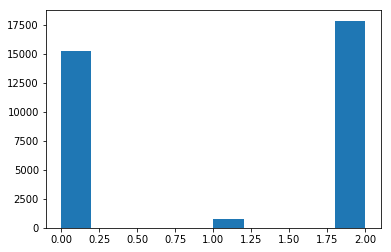

In [4]:
plt.hist(hst_df['star_flag'])

In [5]:
hst_df['z_spec']

0        0.8855
1       -1.0000
2       -1.0000
3       -1.0000
4       -1.0000
5       -1.0000
6       -1.0000
7       -1.0000
8       -1.0000
9       -1.0000
10      -1.0000
11      -1.0000
12      -1.0000
13      -1.0000
14      -1.0000
15      -1.0000
16      -1.0000
17      -1.0000
18      -1.0000
19      -1.0000
20      -1.0000
21      -1.0000
22      -1.0000
23      -1.0000
24      -1.0000
25      -1.0000
26      -1.0000
27      -1.0000
28      -1.0000
29      -1.0000
          ...  
33848   -1.0000
33849   -1.0000
33850   -1.0000
33851   -1.0000
33852   -1.0000
33853   -1.0000
33854   -1.0000
33855   -1.0000
33856   -1.0000
33857   -1.0000
33858   -1.0000
33859   -1.0000
33860   -1.0000
33861   -1.0000
33862   -1.0000
33863   -1.0000
33864   -1.0000
33865   -1.0000
33866   -1.0000
33867   -1.0000
33868   -1.0000
33869   -1.0000
33870   -1.0000
33871   -1.0000
33872   -1.0000
33873   -1.0000
33874   -1.0000
33875   -1.0000
33876   -1.0000
33877   -1.0000
Name: z_spec, Length: 33

(array([146., 132.,  99.,  87.,  73.,  76.,  63.,  46.,  45.,  28.,  38.,
         37.,  25.,  28.,  43.,  27.,  17.,  21.,  18.]),
 array([12.        , 13.73684211, 15.47368421, 17.21052632, 18.94736842,
        20.68421053, 22.42105263, 24.15789474, 25.89473684, 27.63157895,
        29.36842105, 31.10526316, 32.84210526, 34.57894737, 36.31578947,
        38.05263158, 39.78947368, 41.52631579, 43.26315789, 45.        ]),
 <a list of 19 Patch objects>)

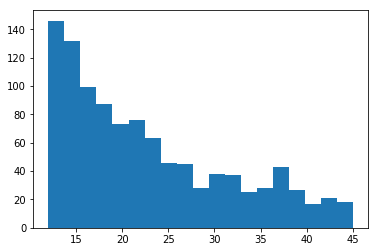

In [6]:
plt.hist(hst_df['f_F140W'],bins=np.linspace(12,45,20))

In [7]:
mdf.columns.values

array(['id', 'x', 'y', 'ra', 'dec', 'faper_F160W', 'eaper_F160W',
       'faper_F140W', 'eaper_F140W', 'f_F160W', 'e_F160W', 'w_F160W',
       'f_U', 'e_U', 'w_U', 'f_B', 'e_B', 'w_B', 'f_G', 'e_G', 'w_G',
       'f_V', 'e_V', 'w_V', 'f_F606W', 'e_F606W', 'w_F606W', 'f_R', 'e_R',
       'w_R', 'f_Rp', 'e_Rp', 'w_Rp', 'f_I', 'e_I', 'w_I', 'f_Ip', 'e_Ip',
       'w_Ip', 'f_F814W', 'e_F814W', 'w_F814W', 'f_Z', 'e_Z', 'w_Z',
       'f_Zp', 'e_Zp', 'w_Zp', 'f_UVISTA_Y', 'e_UVISTA_Y', 'w_UVISTA_Y',
       'f_F125W', 'e_F125W', 'w_F125W', 'f_J1', 'e_J1', 'w_J1', 'f_J2',
       'e_J2', 'w_J2', 'f_J3', 'e_J3', 'w_J3', 'f_J', 'e_J', 'w_J',
       'f_UVISTA_J', 'e_UVISTA_J', 'w_UVISTA_J', 'f_F140W', 'e_F140W',
       'w_F140W', 'f_H1', 'e_H1', 'w_H1', 'f_H2', 'e_H2', 'w_H2', 'f_H',
       'e_H', 'w_H', 'f_UVISTA_H', 'e_UVISTA_H', 'w_UVISTA_H', 'f_K',
       'e_K', 'w_K', 'f_Ks', 'e_Ks', 'w_Ks', 'f_UVISTA_Ks', 'e_UVISTA_Ks',
       'w_UVISTA_Ks', 'f_IRAC1', 'e_IRAC1', 'w_IRAC1', 'f_IRAC2',
       

In [8]:
# Filter 3D HST catalog
# zthresh=0.1
zthresh=0.3
print len(mdf)
# fhst_df = hst_df[(hst_df['faper_F140W']<25) & (hst_df['faper_F140W']>15)]
mdf['F140W'] = 25.0 - 2.5 * np.log10(mdf['f_F140W'])
fhst_df = mdf[(mdf['F140W']<24) & (mdf['F140W']>15)]
# hst_df = hst_df[hst_df['star_flag']==0] # remove stars
print len(fhst_df)
fhst_df = fhst_df[fhst_df['use_phot']==1]
print len(fhst_df)
fhst_df = fhst_df[fhst_df['flags']<2]
print len(fhst_df)
fhst_df = fhst_df[abs(fhst_df['z']-2.0)<zthresh]
print len(fhst_df)
# print fhst_df['z_spec']
fhst_df

33878
4996
4234
2898
433


,id,x,y,ra,dec,faper_F160W,eaper_F160W,faper_F140W,eaper_F140W,f_F160W,...,ltau,metal,lage,Av,lmass,lsfr,lssfr,la2t,chi2,F140W
689,691,8095.2,8386.8,150.104736,2.187411,2.148079,0.042300,1.848545,0.085333,3.666291,...,7.0,0.02,8.0,1.0,9.84,-1.33,-11.17,1.0,1.770,23.752483
1192,1194,8512.3,8663.4,150.097778,2.192021,2.206952,0.029508,2.263605,0.085193,3.372494,...,7.6,0.02,8.3,0.3,9.52,-0.09,-9.61,0.7,1.510,23.652603
2060,2062,6482.1,9175.5,150.131638,2.200557,1.875272,0.052047,1.243067,0.079174,4.454429,...,8.2,0.02,8.9,0.5,10.32,0.16,-10.17,0.7,2.270,23.824444
2138,2140,5526.6,9205.7,150.147583,2.201060,1.852057,0.043311,1.432984,0.142042,3.701528,...,8.4,0.02,8.9,0.6,10.08,0.52,-9.56,0.5,1.120,23.857580
2300,2302,10343.8,9425.7,150.067230,2.204726,6.088034,0.035499,4.717139,0.087858,15.959130,...,7.8,0.02,8.9,1.0,10.85,-2.16,-13.00,1.1,2.010,22.269473
2329,2331,6045.7,9313.5,150.138916,2.202856,2.173798,0.042267,2.087376,0.080829,3.719533,...,8.0,0.02,8.4,0.1,9.50,0.60,-8.90,0.4,1.280,23.617825
2542,2544,5230.0,9446.9,150.152527,2.205080,2.436972,0.058670,2.127133,0.081212,3.755564,...,8.2,0.02,8.3,0.6,9.45,0.99,-8.46,0.1,1.450,23.710951
2631,2633,6974.4,9481.2,150.123428,2.205652,1.558026,0.058675,1.536214,0.084350,2.767174,...,8.0,0.02,8.4,0.0,9.44,0.54,-8.90,0.4,1.920,23.910217
2710,2712,6046.0,9536.6,150.138916,2.206575,2.316963,0.042506,2.138305,0.080798,3.279080,...,8.8,0.02,8.7,0.4,9.53,0.81,-8.72,-0.1,1.450,23.797743
2714,2716,3728.2,9624.6,150.177567,2.208040,4.132455,0.041862,3.513331,0.081873,19.314090,...,9.8,0.02,9.1,1.0,10.81,1.85,-8.95,-0.7,1.260,21.961537


In [9]:
fhst_df.to_csv('/data/emiln/XLSSU122/analysis/3dhst/catalogs/merged_highz_thresh'+str(zthresh)+'_clean.cat',index=None)
# pd.read_csv('/data/emiln/XLSSU122/analysis/3dhst/catalogs/merged_highz.cat')

--------------

### Make source cutouts

In [10]:
fhst_df = pd.read_csv('/data/emiln/XLSSU122/analysis/3dhst/catalogs/merged_highz_thresh'+str(zthresh)+'_clean.cat')

In [11]:
# Load HST fits images

hst_file = '/data/emiln/XLSSU122/analysis/3dhst/cosmos_3dhst_v4.0_f140w/cosmos_3dhst.v4.0.F140W_orig_sci.fits.gz' # conv is F140W convolved to F160W PSF
# http://monoceros.astro.yale.edu/RELEASE_V4.0/3dhst_readme_v4.1.pdf
hst_exp_file = '/data/emiln/XLSSU122/analysis/3dhst/cosmos_3dhst_v4.0_f140w/cosmos_3dhst.v4.0.F140W_exp.fits.gz'
# hst_rms_file = '/data/emiln/XLSSU122/analysis/3dhst/cosmos_3dhst_v4.0_f140w/cosmos_3dhst.v4.0.F140W_orig_wht.fits.gz'
hst_wht_file = '/data/emiln/XLSSU122/analysis/3dhst/cosmos_3dhst_v4.0_f140w/cosmos_3dhst.v4.0.F140W_orig_wht.fits.gz'
# From https://iopscience.iop.org/article/10.1088/0067-0049/214/2/24/pdf:
# The inverse variance weight map is based on the flat-field reference file
# and computed dark value from the image header and the final
# weight image accounts for all background noise sources (sky
# level, read noise, dark current, etc.) but not the Poisson noise
# from the objects themselves.

hst_hdulist = fits.open(hst_file)
full_wcs = wcs.WCS(hst_hdulist[0].header)

exp_hdulist = fits.open(hst_exp_file)
# rms_hdulist = fits.open(hst_rms_file)
wht_hdulist = fits.open(hst_wht_file)

In [13]:
# For each object in fhst_df
# Make a directory to store data products
# Create image cutout with same header and updated wcs info
# Create cutout sigma image in units of cps

import copy

# exptime=1900 # https://archive.stsci.edu/pub/hlsp/candels/cosmos/cos-tot/v1.0/hlsp_candels_hst_cos-tot_readme_v1.0.pdf
w=400
# df = cos_df[cos_df['NUMBER']==886]
# df = cos_df[0:2]
# df = cos_df
df = fhst_df

# df = cos_df
for idx, r in df.iterrows():
    ra = r.ra
    dec = r.dec
    pixcrd = full_wcs.wcs_world2pix(ra,dec, 1)
    print pixcrd
    X = int(pixcrd[0])
    Y = int(pixcrd[1])
    ID = int(r['id'])
    
    print "ID", ID
    print "RA:",ra
    print "DEC:",dec
    print "Initial X:", X
    print "Initial Y:", Y
    
    # tdir = '/data/emiln/XLSSU122/analysis/3dhst/galfit_results/'+str(ID)
    tdir = '/data/emiln/XLSSC122_GalPops/Data/3DHST/Products/galfit_results/'+str(ID)
    try:
        os.mkdir(tdir)
    except:
        print("Directory already exists.")

    print("Making data, exp, rms, wht cutouts")
    wmapcut = full_wcs[Y-w:Y+w,X-w:X+w]
    datacut = hst_hdulist[0].data[Y-w:Y+w,X-w:X+w]
    expcut = exp_hdulist[0].data[Y-w:Y+w,X-w:X+w]
#     rmscut = rms_hdulist[0].data[Y-w:Y+w,X-w:X+w]
    whtcut = wht_hdulist[0].data[Y-w:Y+w,X-w:X+w] # inverse variance
    rmscut = np.sqrt(1./whtcut) # stdev per pixel
    print expcut.shape
    print datacut.shape
    print rmscut.shape
    print whtcut.shape

    newdata = datacut # this is in ELECTRONS/s
    # newexp = expcut
#     newrms = rmscut # this is in ELECTRONS/s
    # newwht = whtcut
    # newcounts = newdata * expcut 
    # newcounts2 = newdata * expcut / 2.5 # Should divide by the gain = 2.5 (e/count) to get this in counts
    
#     central_mask = np.zeros(newdata.shape)
#     xx, yy = np.meshgrid(np.arange(central_mask.shape[0]),np.arange(central_mask.shape[1]))
#     xc = newdata.shape[0]/2
#     yc = newdata.shape[1]/2
#     rthresh = r.FLUX_RADIUS_1_F125W # Mask out inner 20% light radius
#     central_mask_IDs = (xx-xc)**2+(yy-yc)**2 < rthresh**2
#     central_mask[central_mask_IDs] = 1
    
    # nonzero_counts = newcounts.copy()
    # nonzero_counts[nonzero_counts<0] = 0
    
    # nonzero_counts2 = newcounts2.copy()
    # nonzero_counts2[nonzero_counts2<0] = 0
    
    newcounts_meanexp = newdata * np.mean(expcut)
    nonzero_counts_meanexp = newcounts_meanexp.copy()
    nonzero_counts_meanexp[nonzero_counts_meanexp<0] = 0
    # print np.min(nonzero_counts)
    
    # newcounts_meanexp2 = newdata * np.mean(expcut) / 2.5
    # nonzero_counts_meanexp2 = newcounts_meanexp2.copy()
    # nonzero_counts_meanexp2[nonzero_counts_meanexp2<0] = 0
    
#     newsigma = (np.sqrt(1./rmscut) + np.sqrt(nonzero_counts))/expcut
#     newsigma_meanexp = (np.sqrt(1./rmscut) + np.sqrt(nonzero_counts_meanexp))/np.mean(expcut)
#     newsigma_counts = np.sqrt(rmscut * np.mean(expcut)) / 2.5 + np.sqrt(nonzero_counts_meanexp2)
    
    # RMS + POISSON
    newsigma_rms_meanexp = rmscut + np.sqrt(nonzero_counts_meanexp)/np.mean(expcut)
#     newsigma_counts = np.sqrt(rmscut * np.mean(expcut)) / 2.5 + np.sqrt(nonzero_counts_meanexp2)
    
#     newsigma = (np.sqrt(1./newwht) + np.sqrt(nonzero_counts))/expcut
#     newsigma_meanexp = (np.sqrt(1./newwht) + np.sqrt(nonzero_counts_meanexp))/np.mean(expcut)
#     newsigma_counts = (np.sqrt(1./newwht) + np.sqrt(nonzero_counts)) / 2.5

    
#     new_cos_hdu = fits.PrimaryHDU(newdata)
#     new_cos_hdul = fits.HDUList([new_cos_hdu])
#     new_cos_hdul[0].header = cos_hdulist[0].header
#     new_cos_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_cos_filename = tdir+'/cutout.fits'
#     new_cos_hdul.writeto(new_cos_filename, clobber=True)

##### Oct 10 ####

    new_cos_hdu = fits.PrimaryHDU(newdata)
    new_cos_hdul = fits.HDUList([new_cos_hdu])
    new_cos_hdul[0].header = hst_hdulist[0].header
    new_cos_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
    new_cos_hdul[0].header['EXPTIME'] = 1 #CPS
    new_cos_hdul[0].header['GAIN'] = 2.5 #CPS
    new_cos_filename = tdir+'/data_cps.fits'
    new_cos_hdul.writeto(new_cos_filename, clobber=True)
    
#     new_cos_hdu = fits.PrimaryHDU(central_mask)
#     new_cos_hdul = fits.HDUList([new_cos_hdu])
#     new_cos_hdul[0].header = cos_hdulist[0].header
#     new_cos_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_cos_hdul[0].header['EXPTIME'] = 1 #CPS
#     new_cos_hdul[0].header['GAIN'] = 2.5 #CPS
#     new_cos_filename = tdir+'/20p_mask.fits'
#     new_cos_hdul.writeto(new_cos_filename, clobber=True)

    new_sigma_hdu = fits.PrimaryHDU(newsigma_rms_meanexp)
    new_sigma_hdul = fits.HDUList([new_sigma_hdu])
    new_sigma_hdul[0].header = copy.deepcopy(wht_hdulist[0].header)
    new_sigma_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
    new_sigma_hdul[0].header['EXPTIME'] = 1 #CPS
    new_cos_hdul[0].header['GAIN'] = 2.5 #CPS
    new_sigma_filename = tdir+'/sigma_rms_meanexp_cps.fits'
    new_sigma_hdul.writeto(new_sigma_filename, clobber=True)

####################
    
#     new_sigma_hdu = fits.PrimaryHDU(newsigma_counts)
#     new_sigma_hdul = fits.HDUList([new_sigma_hdu])
#     new_sigma_hdul[0].header = copy.deepcopy(rms_hdulist[0].header)
#     new_sigma_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_sigma_filename = tdir+'/sigma_meanexp_counts.fits'
#     new_sigma_hdul.writeto(new_sigma_filename, clobber=True)

#     new_sigma_hdu3 = fits.PrimaryHDU(newsigma_counts)
#     new_sigma_hdul3 = fits.HDUList([new_sigma_hdu3])
#     new_sigma_hdul3[0].header = copy.deepcopy(rms_hdulist[0].header)
#     new_sigma_hdul3[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_sigma_hdul3[0].header['EXPTIME'] = exptime
#     new_sigma_filename = tdir+'/sigma_meanexp_counts_ADU_exp_adjusted.fits'
#     new_sigma_hdul3.writeto(new_sigma_filename, clobber=True)
    
#     new_sigma_hdu = fits.PrimaryHDU(nonzero_counts_meanexp2)
#     new_sigma_hdul = fits.HDUList([new_sigma_hdu])
#     new_sigma_hdul[0].header = copy.deepcopy(rms_hdulist[0].header)
#     new_sigma_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_sigma_filename = tdir+'/counts_cutout_meanexp_ADU.fits'
#     new_sigma_hdul.writeto(new_sigma_filename, clobber=True)
    
#     new_sigma_hdu2 = fits.PrimaryHDU(nonzero_counts_meanexp2)
#     new_sigma_hdul2 = fits.HDUList([new_sigma_hdu2])
#     new_sigma_hdul2[0].header = copy.deepcopy(rms_hdulist[0].header)
#     new_sigma_hdul2[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_sigma_hdul2[0].header['EXPTIME'] = exptime
#     new_sigma_filename = tdir+'/counts_cutout_meanexp_ADU_exp_adjusted.fits'
#     new_sigma_hdul2.writeto(new_sigma_filename, clobber=True)


#     new_sigma_hdu = fits.PrimaryHDU(newsigma)
#     new_sigma_hdul = fits.HDUList([new_sigma_hdu])
#     new_sigma_hdul[0].header = rms_hdulist[0].header
#     new_sigma_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_sigma_filename = tdir+'/wht_sigma_cutout.fits'
#     new_sigma_hdul.writeto(new_sigma_filename, clobber=True)
    
#     new_sigma_meanexp_hdu = fits.PrimaryHDU(newsigma_meanexp)
#     new_sigma_meanexp_hdul = fits.HDUList([new_sigma_meanexp_hdu])
#     new_sigma_meanexp_hdul[0].header = rms_hdulist[0].header
#     new_sigma_meanexp_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_sigma_meanexp_filename = tdir+'/wht_sigma_meanexp_cutout.fits'
#     new_sigma_meanexp_hdul.writeto(new_sigma_meanexp_filename, clobber=True)
    
#     new_counts_hdu = fits.PrimaryHDU(newcounts)
#     new_counts_hdul = fits.HDUList([new_counts_hdu])
#     new_counts_hdul[0].header = cos_hdulist[0].header
#     new_counts_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_counts_filename = tdir+'/counts_cutout.fits'
#     new_counts_hdul.writeto(new_counts_filename, clobber=True)
    
#     new_counts_meanexp_hdu = fits.PrimaryHDU(newcounts_meanexp)
#     new_counts_meanexp_hdul = fits.HDUList([new_counts_meanexp_hdu])
#     new_counts_meanexp_hdul[0].header = cos_hdulist[0].header
#     new_counts_meanexp_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_counts_meanexp_filename = tdir+'/counts_meanexp_cutout.fits'
#     new_counts_meanexp_hdul.writeto(new_counts_meanexp_filename, clobber=True)
    
#     new_exp_hdu = fits.PrimaryHDU(newexp)
#     new_exp_hdul = fits.HDUList([new_exp_hdu])
#     new_exp_hdul[0].header = exp_hdulist[0].header
#     new_exp_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_exp_filename = tdir+'/exp_cutout.fits'
#     new_exp_hdul.writeto(new_exp_filename, clobber=True)
    
#     new_rms_hdu = fits.PrimaryHDU(newrms)
#     new_rms_hdul = fits.HDUList([new_rms_hdu])
#     new_rms_hdul[0].header = rms_hdulist[0].header
#     new_rms_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_rms_filename = tdir+'/rms_cutout.fits'
#     new_rms_hdul.writeto(new_rms_filename, clobber=True)

19320
Directory already exists.
Making data, exp, rms, wht cutouts
(800, 800)
(800, 800)
(800, 800)
(800, 800)
[array(4347.28325297), array(19349.31495156)]
ID 18741
RA: 150.16725159
DEC: 2.37011862
Initial X: 4347
Initial Y: 19349
Directory already exists.
Making data, exp, rms, wht cutouts
(800, 800)
(800, 800)
(800, 800)
(800, 800)
[array(6614.02962067), array(19364.25428477)]
ID 18781
RA: 150.12944031
DEC: 2.37036848
Initial X: 6614
Initial Y: 19364
Directory already exists.
Making data, exp, rms, wht cutouts
(800, 800)
(800, 800)
(800, 800)
(800, 800)
[array(8540.48745146), array(19449.44592352)]
ID 18924
RA: 150.09730530000002
DEC: 2.37178826
Initial X: 8540
Initial Y: 19449
Directory already exists.
Making data, exp, rms, wht cutouts
(800, 800)
(800, 800)
(800, 800)
(800, 800)
[array(4568.65699878), array(19488.22515558)]
ID 18925
RA: 150.16355896
DEC: 2.3724339
Initial X: 4568
Initial Y: 19488
Directory already exists.
Making data, exp, rms, wht cutouts
(800, 800)
(800, 800)
(8

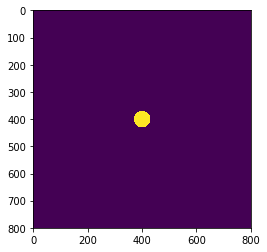

In [14]:
central_mask = np.zeros(newdata.shape)
xx, yy = np.meshgrid(np.arange(central_mask.shape[0]),np.arange(central_mask.shape[1]))
xc = newdata.shape[0]/2
yc = newdata.shape[1]/2
r = 30
central_mask_IDs = (xx-xc)**2+(yy-yc)**2 < r**2
plt.imshow(central_mask_IDs)